# yaw analysis

## Fetch data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import utm
import scipy
import scipy.interpolate
import scipy.signal
from scipy.spatial.transform import Rotation
from car_dynamics.envs.kinematic_bicycle_model import LF, LR
from car_dynamics.analysis import pos2vel_savgol, calc_delta, interpolate, rotate_point, calc_delta_v
from offroad.utils import load_state
import ipywidgets as widgets
from ipywidgets import interact
from termcolor import colored
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
log_dir = '/Users/wenlixiao/Desktop/offroad/' + 'data/data-20231227-183524'


In [5]:
ORIENTATION_PROVIDOER = 'imu'
t_list, p_dict, yaw_dict, action_list = load_state(log_dir, [0, 160], orientation_provider=ORIENTATION_PROVIDOER)
yaw_vicon = yaw_dict['vicon']
# yaw_zed2 = yaw_dict['zed2']
yaw_ang_vel = yaw_dict['zed2_ang_vel']
# vesc_ang_vel = yaw_dict['vesc_ang_vel']
p_list = p_dict['vicon']
# yaw_list = yaw_dict['vesc']
yaw_vicon_calibrated = yaw_vicon + np.pi/2
yaw_vicon_calibrated = np.arctan2(np.sin(yaw_vicon_calibrated), np.cos(yaw_vicon_calibrated))

Output()

[INFO] In total 160 logs


## $\Delta$ Yaw vs Yaw Ang Vel

Text(0.5, 0, 'time step')

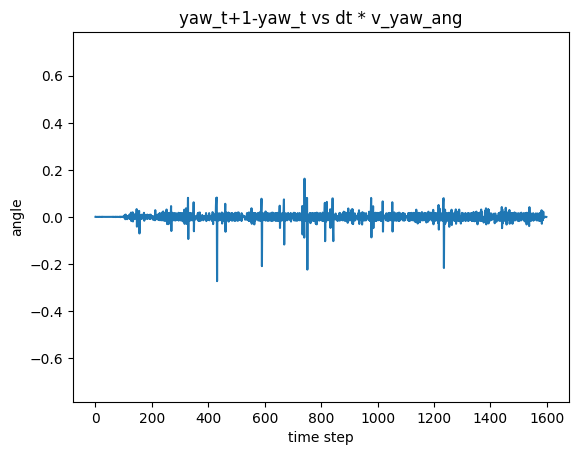

In [14]:
error_list = []
for i in range(len(yaw_vicon_calibrated) - 1):
    error = (yaw_vicon_calibrated[i+1] - yaw_vicon_calibrated[i]) - \
                (t_list[i+1] - t_list[i]) * yaw_ang_vel[i]
    error = np.arctan2(np.sin(error), np.cos(error))
    error_list.append(error)
plt.plot(error_list)
plt.title("yaw_t+1-yaw_t vs dt * v_yaw_ang")
plt.ylabel("angle")
plt.ylim([-np.pi/4,np.pi/4])
plt.xlabel("time step")